In [1]:
import pandas as pd
import numpy as np

In [ ]:
!pip install saspy

In [2]:
import saspy

In [ ]:
from saspy import autocfg

In [ ]:
autocfg.main()

In [3]:
sas = saspy.SASsession()

Using SAS Config named: autogen_winlocal
SAS Connection established. Subprocess id is 7676

The encoding value provided doesn't match the SAS session encoding.
SAS encoding is wlatin2. Specified encoding is windows-1252.
Using encoding cp1250 instead to avoid transcoding problems.
You can override this change, if you think you must, by changing the encoding attribute of the SASsession object, as follows.
If you had 'sas = saspy.SASsession(), then submit: "sas._io.sascfg.encoding='override_encoding'" to change it.



In [4]:
sas

Access Method         = IOM
SAS Config name       = autogen_winlocal
SAS Config file       = c:\users\sebastianzajac\desktop\p3env\lib\site-packages\saspy\sascfg_personal.py
WORK Path             = C:\Users\SEBAST~1\AppData\Local\Temp\SAS Temporary Files\_TD14276_DESKTOP-3S3DM1O_\Prc2\
SAS Version           = 9.04.01M6P11152018
SASPy Version         = 3.6.2
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = wlatin2
Python Encoding value = cp1250
SAS process Pid value = 14276


In [5]:
%%SAS sas

data class_c;
set sashelp.class;
wzrost = round(height*2.54, 1);
waga = round(weight*0.453, 1);
drop height weight;
run;
/*
title Pierwszy raport;
proc print data=class_c noobs;
where sex='F' and age >13;
run;
*/

In [6]:
fname = 'myfile.txt'
sas.symput ('fname', fname)

In [7]:
%%SAS sas
Filename file1 "&fname.";

%put &fname.;

proc summary data=sashelp.class;
    var weight;
run;
%let summaryrc=&syserr;
%put &summaryrc.;

proc univariate data=sashelp.class noprint;
    var height weight;
run;
%let unirc=&syserr;
%put &unirc.;

In [8]:
sas.assigned_librefs()

['WORK', 'MAPS', 'SASHELP', 'MAPSSAS', 'MAPSGFK', 'SASUSER']

In [9]:
sas.submit("""LIBNAME dane "C:\\Users\\SebastianZajac\\Desktop\\SAS PRESETATION";""")

{'LOG': '\x0c21                                                           System SAS                            20:05 Wednesday, December 9, 2020\n\n141        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode=\'inline\') device=svg style=HTMLBlue;\n141      ! ods graphics on / outputfmt=png;\nNOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1\n142        \n143        LIBNAME dane "C:\\Users\\SebastianZajac\\Desktop\\SAS PRESETATION";\nNOTE: Libref DANE was successfully assigned as follows: \n      Engine:        V9 \n      Physical Name: C:\\Users\\SebastianZajac\\Desktop\\SAS PRESETATION\n144        \n145        \n146        ods html5 (id=saspy_internal) close;ods listing;\n147        \n\x0c22                                                           System SAS                            20:05 Wednesday, December 9, 2020\n\n148        ',
 'LST': ''}

In [10]:
sas.assigned_librefs() 

['WORK', 'DANE', 'MAPS', 'SASHELP', 'MAPSSAS', 'MAPSGFK', 'SASUSER']

In [11]:
df = pd.read_csv('diabetes.csv')

In [12]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [13]:
sas_df = sas.read_csv('diabetes.csv')

In [14]:
sas_df

Libref  = WORK
Table   = _csv
Dsopts  = {}
Results = Pandas

In [16]:
sas.submit("data dane.diabets;set _csv;run;")

{'LOG': "\x0c44                                                           System SAS                            20:05 Wednesday, December 9, 2020\n\n333        ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;\n333      ! ods graphics on / outputfmt=png;\nNOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1\n334        \n335        data dane.diabets;set _csv;run;\n\nNOTE: There were 15000 observations read from the data set WORK._CSV.\nNOTE: The data set DANE.DIABETS has 15000 observations and 10 variables.\nNOTE: Instrukcja DATA zajęła (całkowity czas przetwarzania):\n      real time           0.01 seconds\n      cpu time            0.00 seconds\n      \n\n336        \n337        \n338        ods html5 (id=saspy_internal) close;ods listing;\n339        \n\x0c45                                                           System SAS                            20:05 Wednesday, December 9, 2020\n\n340        ",
 'LST': 

In [15]:
sas_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
type(sas_df.head())

In [17]:
# pd.DataFrame -> SAStable
df2 = sas.df2sd(df)

In [ ]:
df2

In [ ]:
sas.list_tables('work')

In [ ]:
sas.list_tables('dane')

In [18]:
iris_sas = sas.sasdata('iris','sashelp')

In [ ]:
?sas.sasdata

In [ ]:
??sas.sasdata

In [ ]:
iris_sas

In [ ]:
iris_sas.head()

In [ ]:
iris_sas.info()

In [ ]:
iris_sas.columnInfo()

In [19]:
iris_sas.means()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,SepalLength,Sepal Length (mm),150,0,58.0,58.433333,8.280661,43,51,58.0,64,79
1,SepalWidth,Sepal Width (mm),150,0,30.0,30.573333,4.358663,20,28,30.0,33,44
2,PetalLength,Petal Length (mm),150,0,43.5,37.580000,17.652982,10,16,43.5,51,69
3,PetalWidth,Petal Width (mm),150,0,13.0,11.993333,7.622377,1,3,13.0,18,25


In [20]:
sas.teach_me_SAS(True)
iris_sas.means()
sas.teach_me_SAS(False)

proc means data=sashelp.'iris'n  stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;


In [21]:
%%SAS sas
proc means data=sashelp.'iris'n  stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;

Zmienna,Etykieta,N,N braków,Mediana,Średnia,Odch. std.,Minimum,25. centyl,50. centyl,75. centyl,Maksimum
SepalLength,Sepal Length (mm),150,0,58.000000,58.433333,8.280661,43.000000,51.000000,58.000000,64.000000,79.000000
SepalWidth,Sepal Width (mm),150,0,30.000000,30.573333,4.358663,20.000000,28.000000,30.000000,33.000000,44.000000
PetalLength,Petal Length (mm),150,0,43.500000,37.580000,17.652982,10.000000,16.000000,43.500000,51.000000,69.000000
PetalWidth,Petal Width (mm),150,0,13.000000,11.993333,7.622377,1.000000,3.000000,13.000000,18.000000,25.000000


In [ ]:
iris_sas.bar('Species')


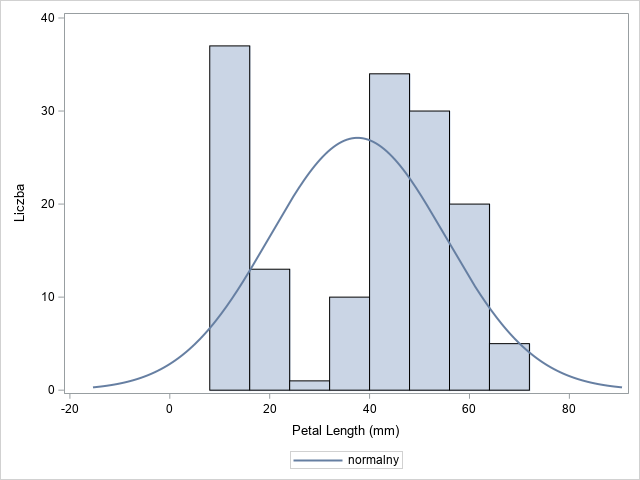

In [22]:
iris_sas.hist('PetalLength')

In [ ]:
iris_sas.heatmap('PetalLength','PetalWidth')

In [ ]:
vlist = iris_sas.info().Variable.tolist()
vlist

In [ ]:
iris_sas.columns

In [23]:
c = sas.submit("""proc print data=sashelp.class; run;""")

In [24]:
print(c['LOG'])

83                                                           System SAS                            20:05 Wednesday, December 9, 2020

15616      ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
15616    ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
15617      
15618      proc print data=sashelp.class; run;

NOTE: There were 19 observations read from the data set SASHELP.CLASS.
NOTE: PROCEDURE PRINT zajęła (całkowity czas przetwarzania):
      real time           0.03 seconds
      cpu time            0.03 seconds
      

15619      
15620      
15621      ods html5 (id=saspy_internal) close;ods listing;
15622      
84                                                           System SAS                            20:05 Wednesday, December 9, 2020

15623      


In [25]:
from IPython.display import HTML


In [26]:
HTML(c['LST'])

Obs.,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5
6,James,M,12,57.3,83.0
7,Jane,F,12,59.8,84.5
8,Janet,F,15,62.5,112.5
9,Jeffrey,M,13,62.5,84.0
10,John,M,12,59.0,99.5


In [ ]:
a =iris_sas.means()

In [ ]:
a[a.Median>25]